In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

import google.cloud.bigquery as bq
client = bq.Client.from_service_account_json("marius_arlauskas.json")

In [3]:
query = """SELECT * FROM `surfshark-analytics.temp_linas.attribution_test_v2`"""

In [4]:
def get_data(sql_query):

    # Make an API request.
    query_job = client.query(sql_query)

    # Convert as dataframe
    dataframe = (
        query_job
        .result()
        .to_dataframe()
    )
    return dataframe

#df = get_data(query)
df = pd.read_csv('real.csv')

In [5]:
df = pd.read_csv('real.csv')

In [ ]:
df.to_csv('real.csv')

In [ ]:
df.head(10)

Let's try to replicate this into df below:

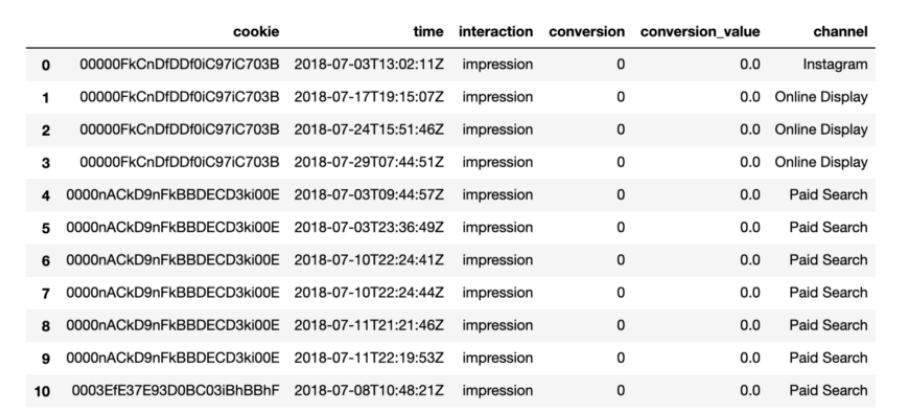

In [ ]:
df.isna().sum()

In [ ]:
new_df = pd.DataFrame()

In [ ]:
new_df['cookie'] = df['clientId']

In [ ]:
new_df['conversion'] = df['transactionRevenue'].isna()*1

In [ ]:
new_df['conversion_value'] = df['transactionRevenue'].fillna(0)

In [ ]:
new_df['time'] = df['visit_started_at']
new_df['channel'] = df['channel']

In [ ]:
df = new_df

In [ ]:
df_paths = df.groupby('cookie')['channel'].aggregate(
    lambda x: x.unique().tolist()).reset_index()
    
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')

df_paths['path'] = df_paths['channel']

df_paths = df_paths[['cookie', 'path']]

In [ ]:
(df_paths['path'].apply(len) == 1).sum()/len(df_paths)